YOLOv8 Instance Segmentation of wrinkles

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

In [ ]:
!nvidia-smi

Tue Dec 19 19:09:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28 -qq -U

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow -qq -U

from roboflow import Roboflow
rf = Roboflow(api_key="pyJdTQUxOgmebewY8nb3")
project = rf.workspace("robbo").project("face-wrinkles-detection")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Face-Wrinkles-Detection--1 in yolov8:: 100%|██████████| 1842/1842 [00:00<00:00, 4523.10it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 377MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Face-Wrinkles-Detection--1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskPR_curve.png	 train_batch2.jpg
BoxF1_curve.png					    MaskR_curve.png	 val_batch0_labels.jpg
BoxP_curve.png					    results.csv		 val_batch0_pred.jpg
BoxPR_curve.png					    results.png		 val_batch1_labels.jpg
BoxR_curve.png					    train_batch0.jpg	 val_batch1_pred.jpg
confusion_matrix.png				    train_batch1840.jpg  val_batch2_labels.jpg
events.out.tfevents.1703013240.d44ddfa29637.2877.0  train_batch1841.jpg  val_batch2_pred.jpg
MaskF1_curve.png				    train_batch1842.jpg  weights
MaskP_curve.png					    train_batch1.jpg


/content


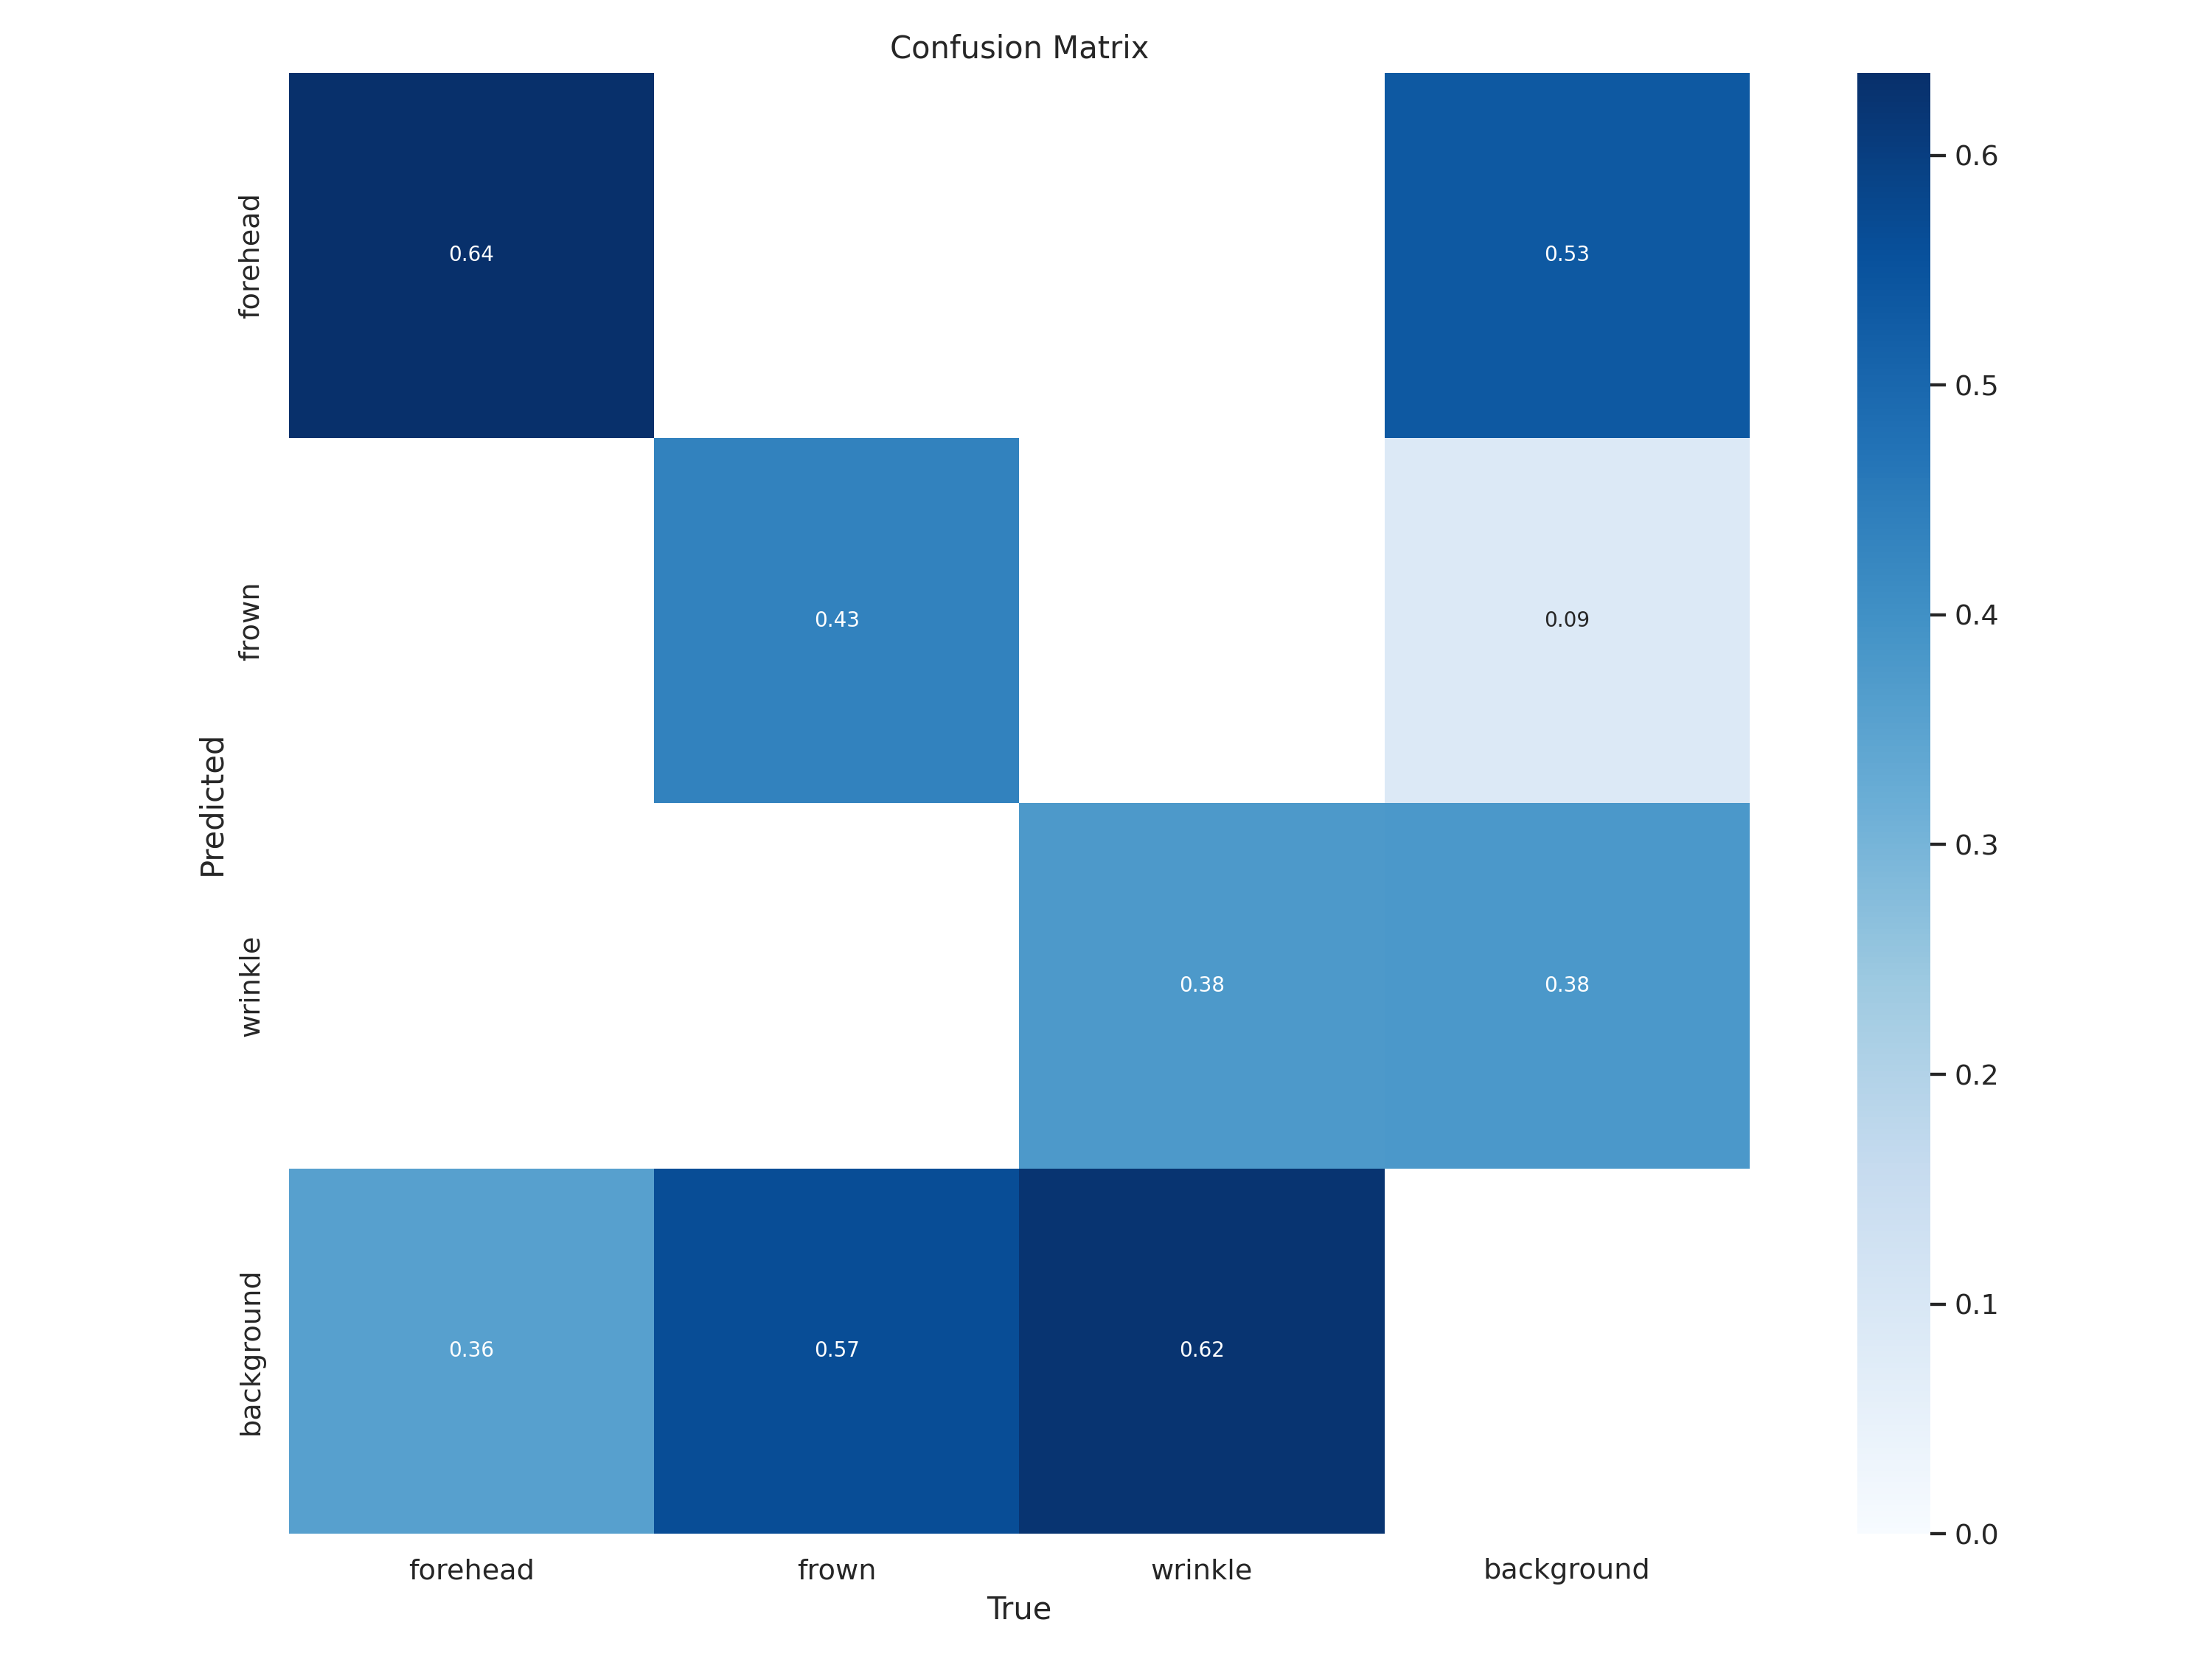

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


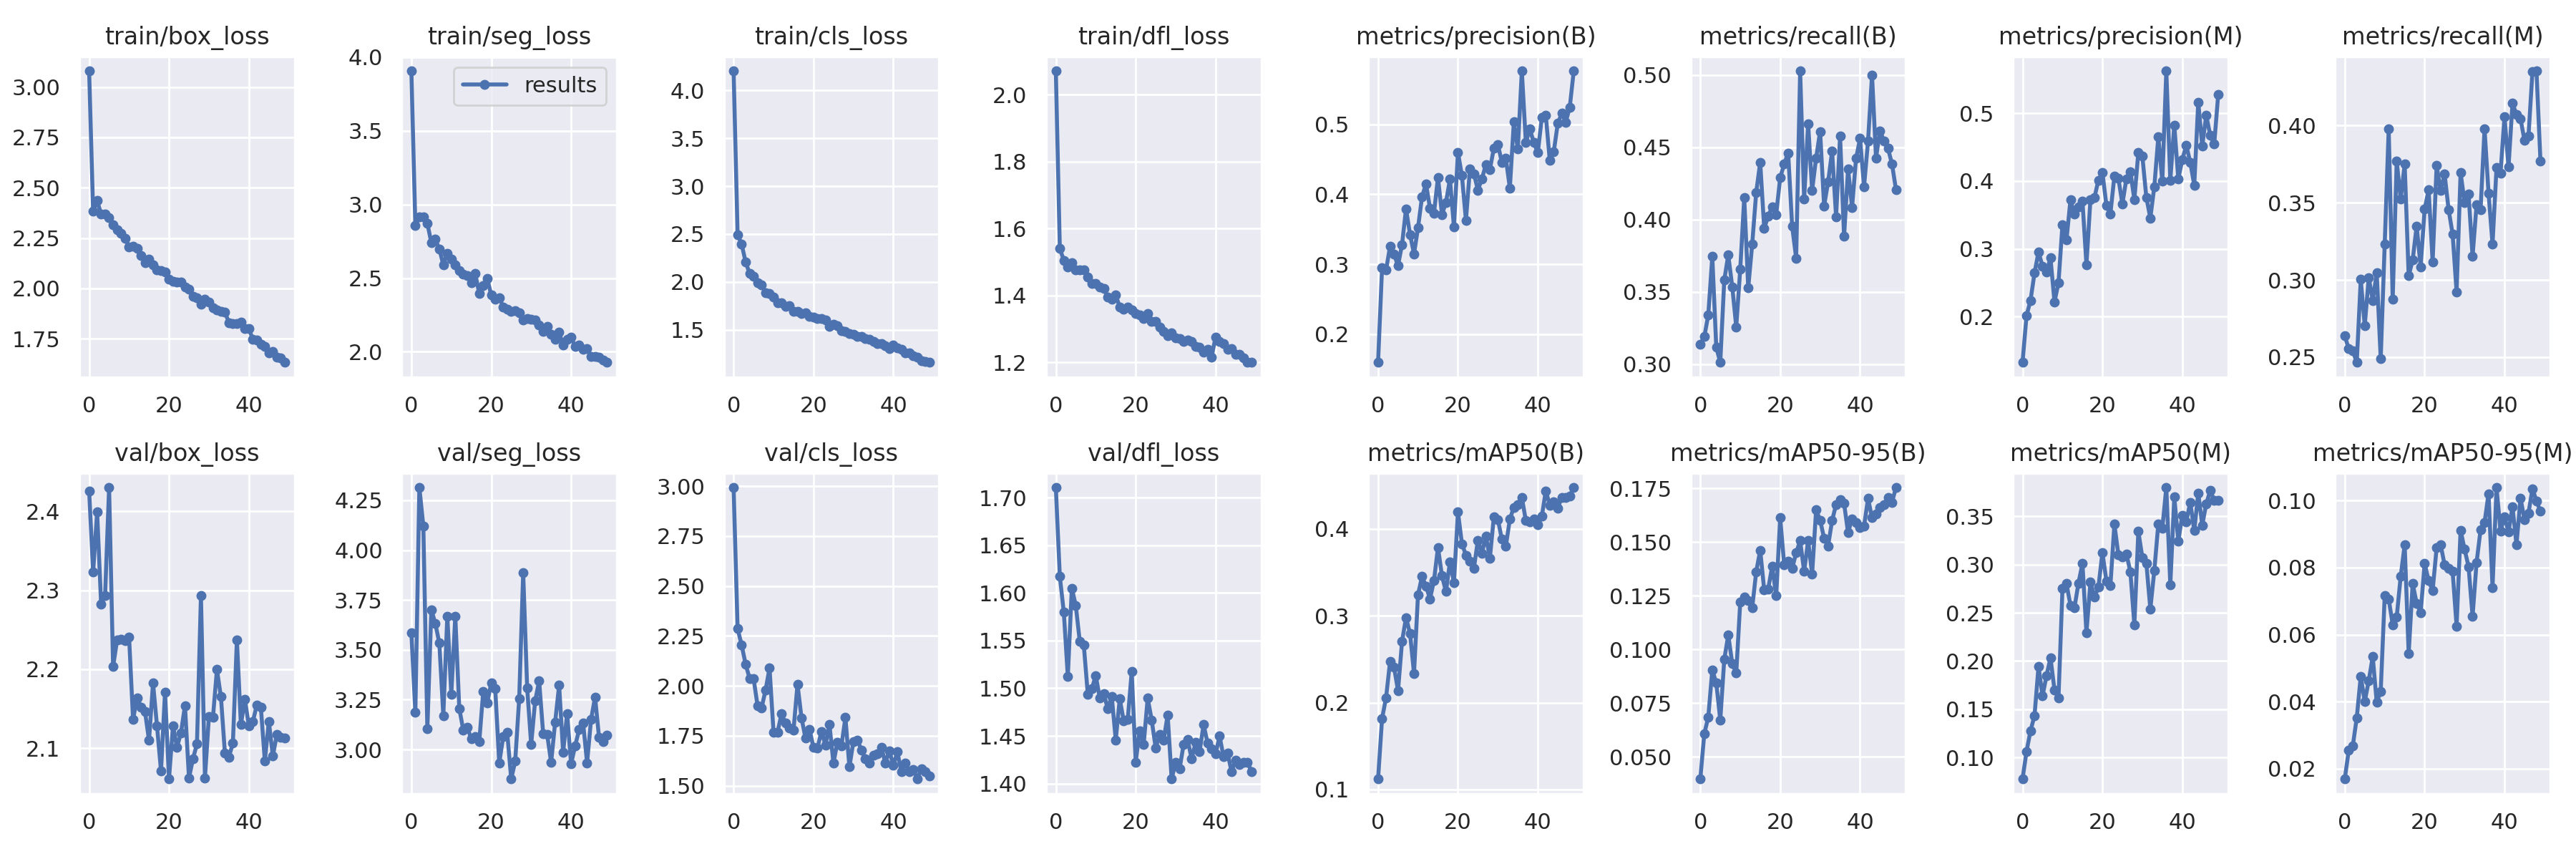

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


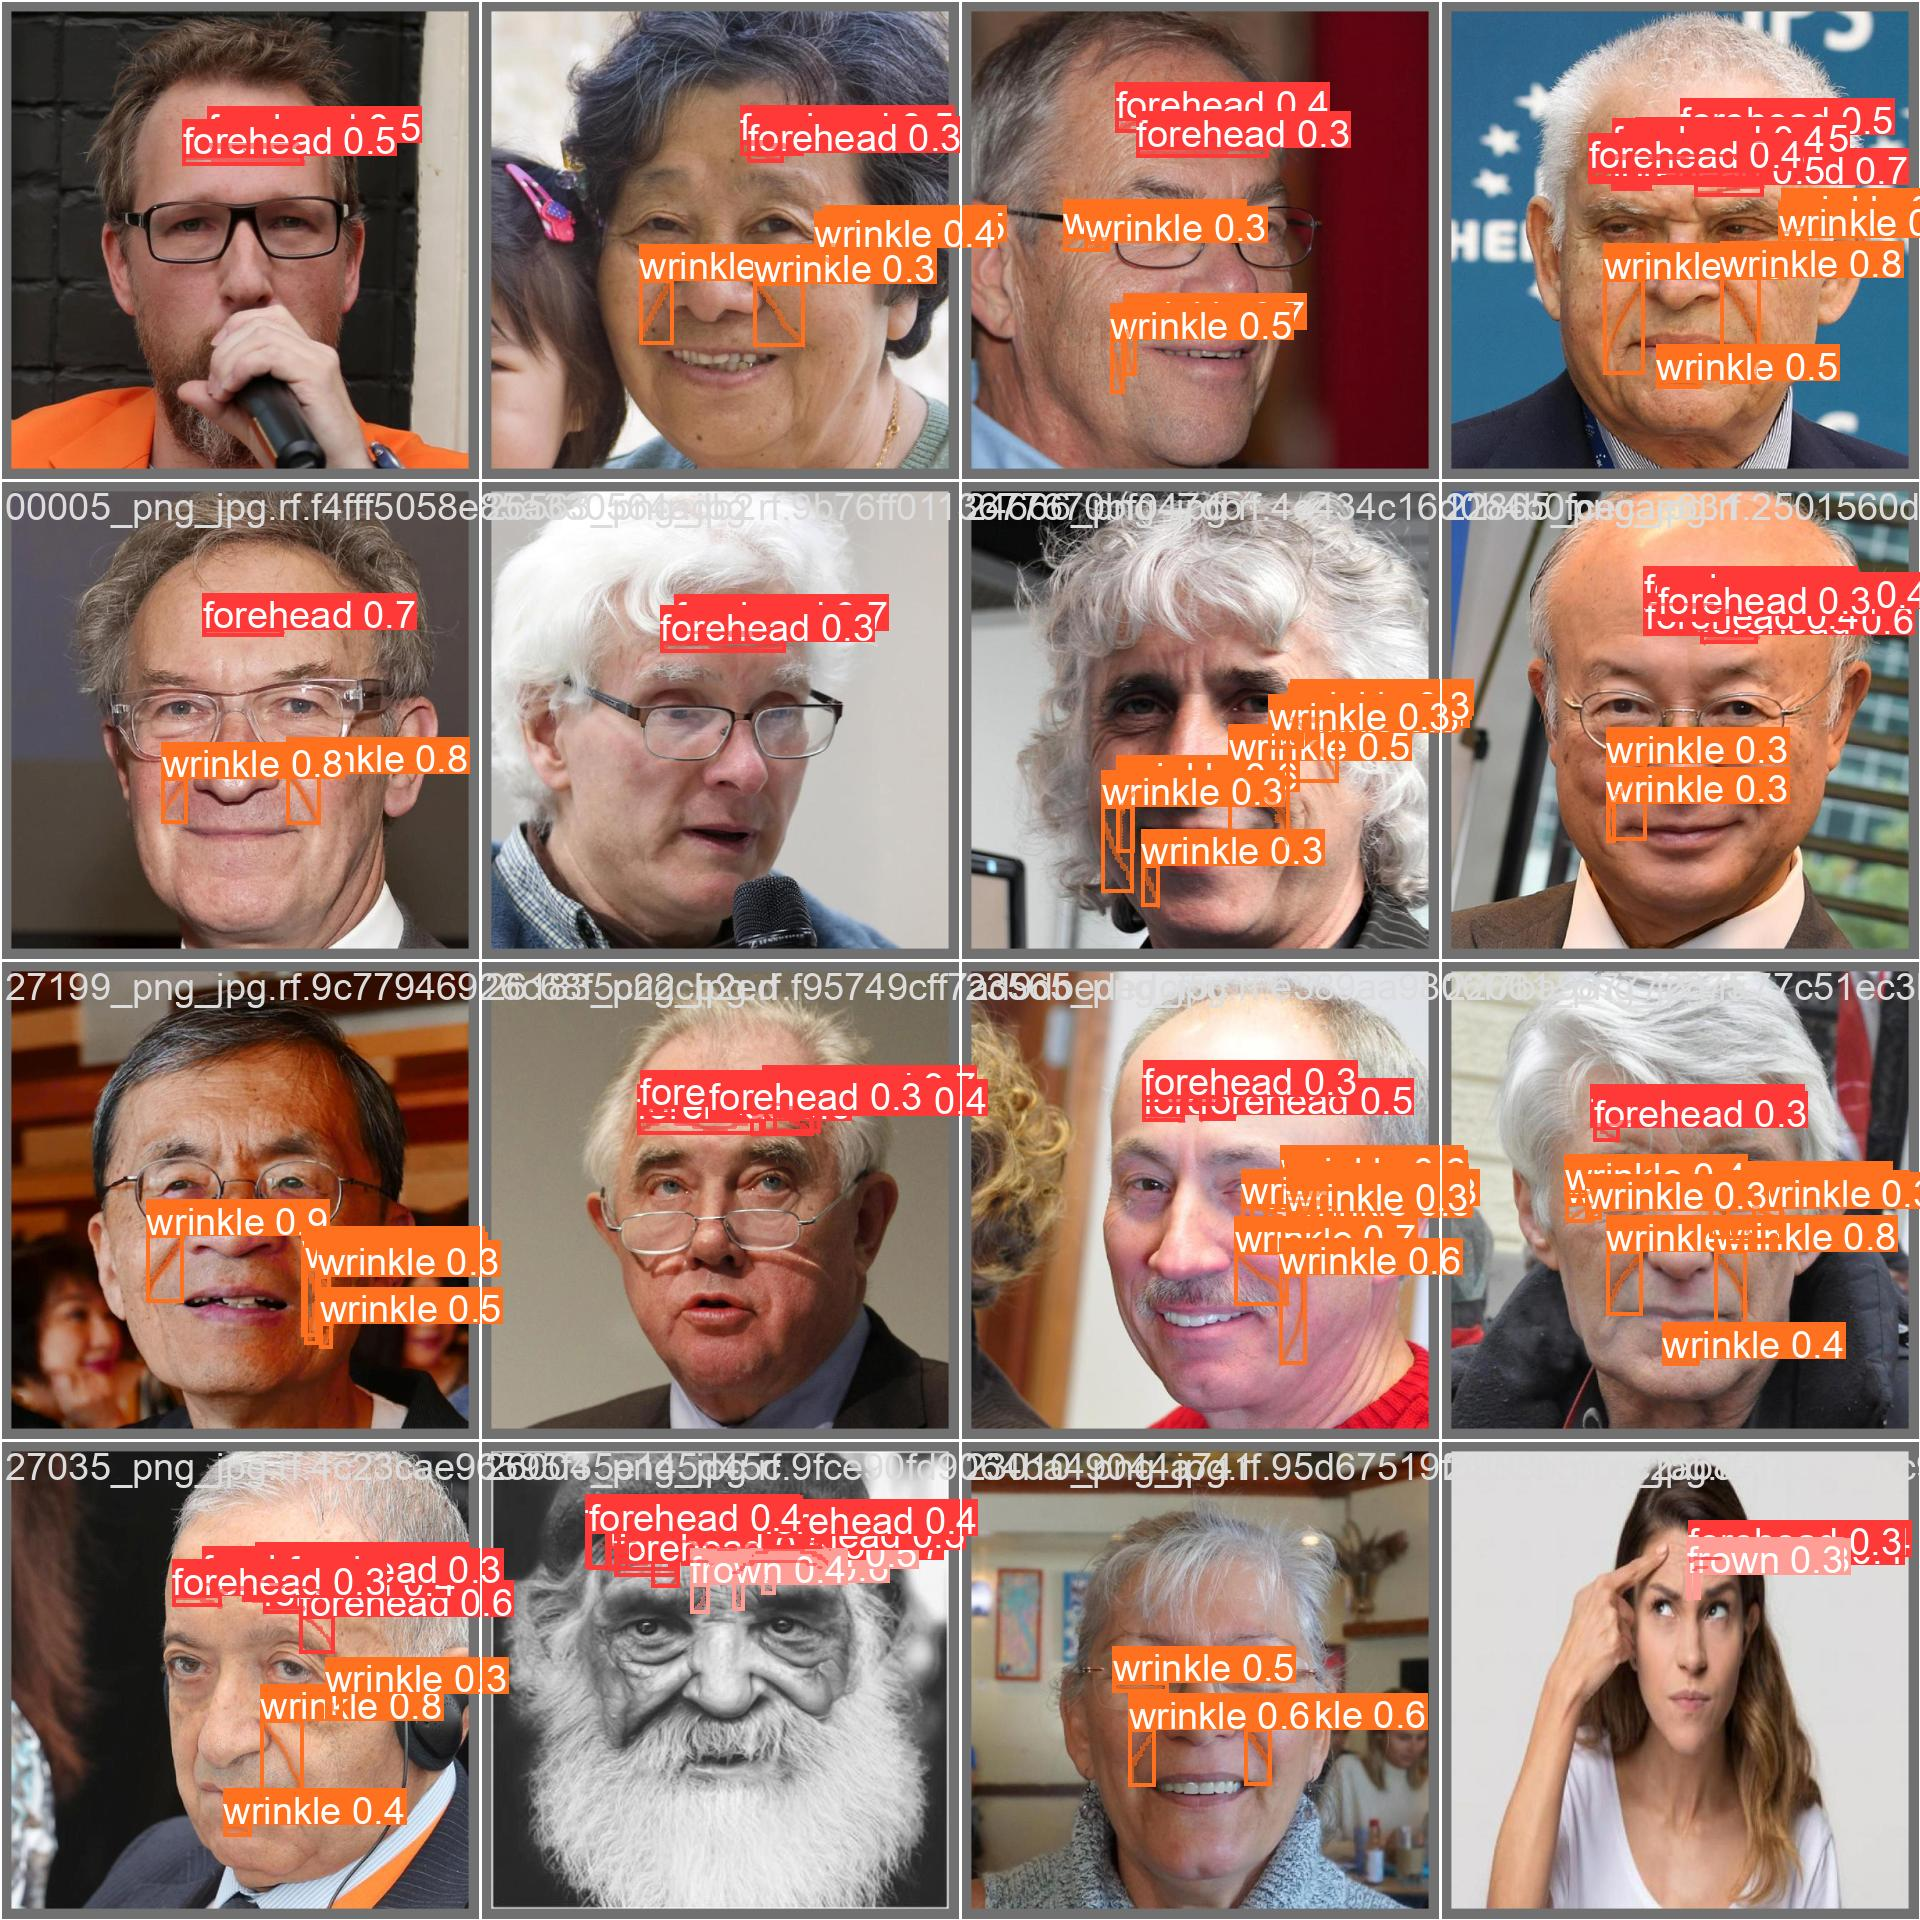

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-19 20:09:35.792897: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 20:09:35.792968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 20:09:35.794423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 20:09:36.895669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Face-Wrinkles-Detection--1

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-12-19 20:12:26.964348: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 20:12:26.964399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 20:12:26.965795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 20:12:28.045983: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/51 /con

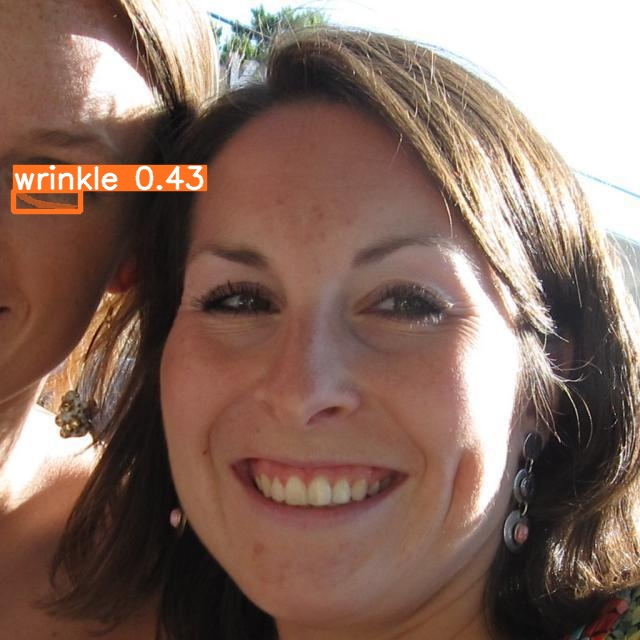

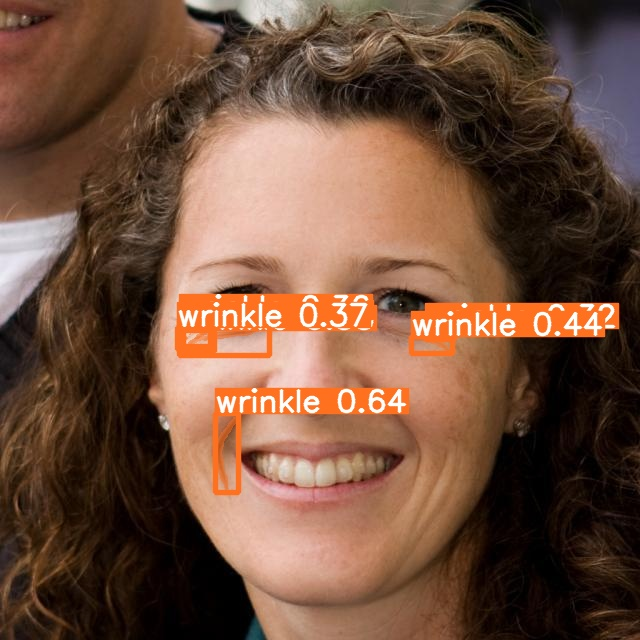

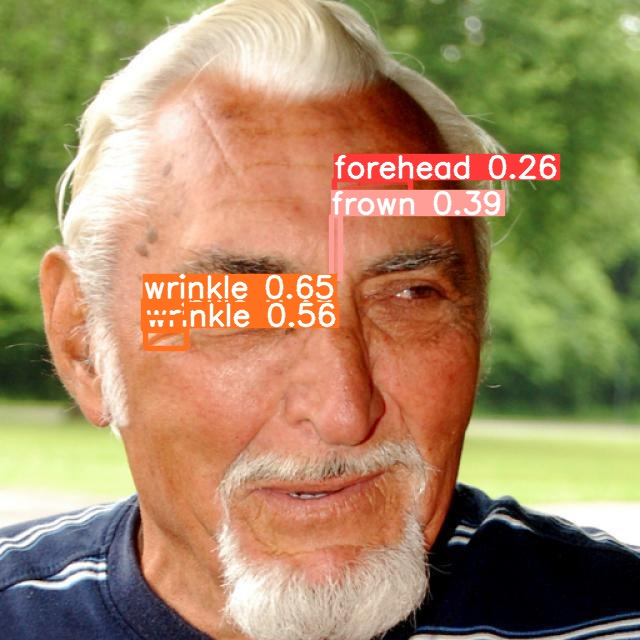

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
import torch
from ultralytics import YOLO


model = YOLO("/content/runs/segment/train/weights/best.pt")


with torch.no_grad():
    results = model.predict(task="segment", source="/content/16_jpeg_jpg.rf.9a7d9e76ac3b8c2d5f638cff08bf960f.jpg", max_det=1000, conf=0.13, hide_labels=True, boxes=False, save=True, device="0")

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/16_jpeg_jpg.rf.9a7d9e76ac3b8c2d5f638cff08bf960f.jpg: 640x640 11 foreheads, 2 wrinkles, 21.0ms
Speed: 0.6ms pre-process, 21.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict6
